# Stock Market Prediction And Forecasting Using Stacked LSTM

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# Loading dataset

url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
tataglobal_df = pd.read_csv(url)
tataglobal_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [50]:
tataglobal_df.shape

(2035, 8)

In [51]:
tataglobal_df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [52]:
tataglobal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [53]:
tataglobal_df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [54]:
tataglobal_df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [55]:
tataglobal_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


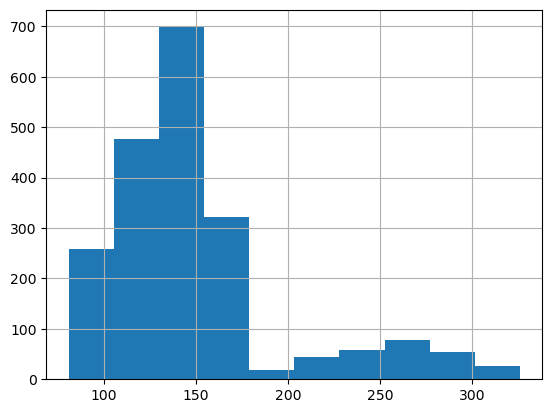

In [56]:
tataglobal_df.Close.hist();

In [57]:
# Imoporting data again but this time parse dates

df = pd.read_csv(url, 
                 parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [58]:
df.Date.dtype

dtype('<M8[ns]')

In [59]:
tataglobal_df.Date.dtype


dtype('O')

In [60]:
tataglobal_df.Date.head()

0    2018-09-28
1    2018-09-27
2    2018-09-26
3    2018-09-25
4    2018-09-24
Name: Date, dtype: object

In [61]:
df.Date.head()

0   2018-09-28
1   2018-09-27
2   2018-09-26
3   2018-09-25
4   2018-09-24
Name: Date, dtype: datetime64[ns]

In [62]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [63]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [64]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [65]:
# Sort Dataframe in date order

df.sort_values(by=["Date"], inplace=True, ascending=True)
df.Date.head()

2034   2010-07-21
2033   2010-07-22
2032   2010-07-23
2031   2010-07-26
2030   2010-07-27
Name: Date, dtype: datetime64[ns]

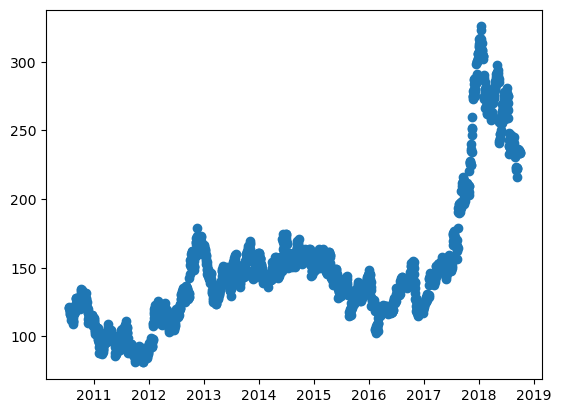

In [66]:
# Let's visualize closing price vs Date... 


fig, ax = plt.subplots()
ax.scatter(df.Date, df.Close);

In [67]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [68]:
copy_df = df.copy()
copy_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [69]:
copy_df.reset_index(inplace =True)
copy_df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [70]:
copy_df.drop("index", axis=1, inplace=True)

In [71]:
copy_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [72]:
# Let's see correlation matrix...
copy_df.corr()

C:\Windows\Temp\ipykernel_14136\4268513041.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_df.corr()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


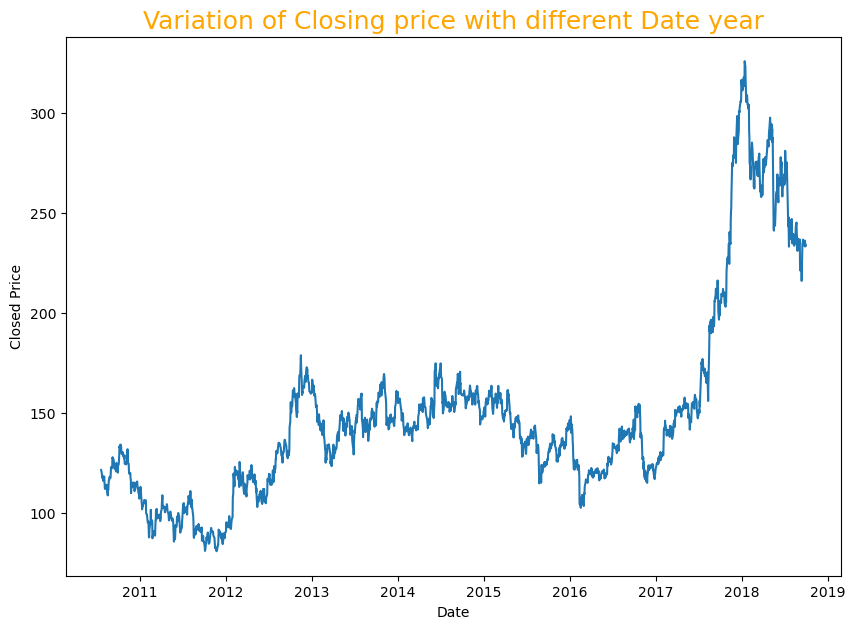

In [73]:
plt.figure(figsize=(10,7))
plt.plot(copy_df["Date"],
         copy_df["Close"])
plt.xlabel("Date")
plt.ylabel("Closed Price");
plt.title("Variation of Closing price with different Date year",
          color="orange",
          fontsize=18);

In [74]:
# Considering only `Close` variable...

close_df = copy_df["Close"]
close_df

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [75]:
close_df.size

2035

In [76]:
close_df.shape

(2035,)

In [77]:
close_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2035 entries, 0 to 2034
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
2035 non-null   float64
dtypes: float64(1)
memory usage: 16.0 KB


In [78]:
close_df.describe()

count    2035.00000
mean      149.45027
std        48.71204
min        80.95000
25%       120.05000
50%       141.25000
75%       156.90000
max       325.75000
Name: Close, dtype: float64

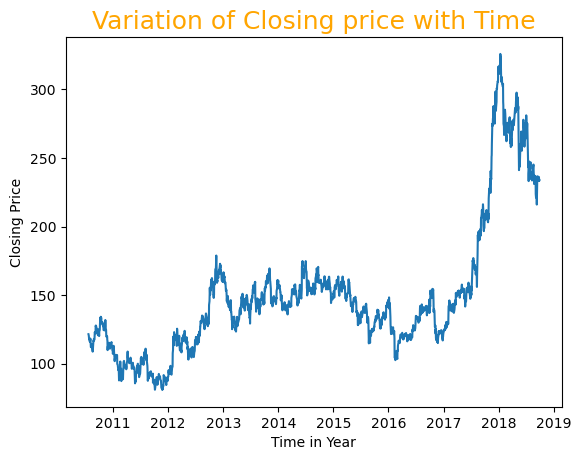

In [79]:
plt.plot(copy_df.Date, close_df)
plt.xlabel("Time in Year")
plt.ylabel("Closing Price");
plt.title("Variation of Closing price with Time",
          color="orange",
          fontsize=18);

In [80]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0,1)) # (0,1) by default.But mentioned for understanding
close_df = minmax.fit_transform(np.array(close_df).reshape(-1, 1))
close_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [81]:
train_size = int(len(close_df)*0.7)
test_size = len(close_df) - train_size
train_data = close_df[:train_size, :] # Slicing row from 0 to train_size indexlocation but column is kept unsliced.
test_data = close_df[train_size:len(close_df), :1]

In [82]:
train_data.shape

(1424, 1)

In [83]:
test_data.shape

(611, 1)

In [84]:
1424 + 611

2035

In [85]:
test_data[:10]

array([[0.1621732 ],
       [0.15951797],
       [0.16707516],
       [0.15992647],
       [0.16053922],
       [0.16441993],
       [0.16687092],
       [0.1693219 ],
       [0.16074346],
       [0.15972222]])

In [86]:
#This function will create dataset as mentioned above...

def create_dataset(dataset, time_step):
    X_data = []
    Y_data = []
    for i in range(len(dataset)-time_step-1):
        X_data.append(dataset[i:(i+time_step), 0])
        Y_data.append(dataset[i+time_step, 0])
    return np.array(X_data), np.array(Y_data)

In [87]:
# Reshaping into tuples of the form with X=t, t+1,..t+99 and Y=t+100 for time_step=100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [88]:
X_train.shape

(1323, 100)

In [89]:
y_train.shape

(1323,)

In [90]:
X_test.shape, y_test.shape

((510, 100), (510,))

In [91]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [92]:
# Constructing our stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1))) #Input layer with 50 neurons
model.add(LSTM(50, return_sequences=True)) # Hidden layers with 50 neurons
model.add(LSTM(50))
model.add(Dense(1))# Output Layer
model.compile(loss='mean_squared_error', optimizer='adam')

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1);


Epoch 1/100
21/21 [==============================] - 21s 428ms/step - loss: 0.0073 - val_loss: 0.0134
Epoch 2/100
21/21 [==============================] - 6s 301ms/step - loss: 0.0016 - val_loss: 0.0103
Epoch 3/100
21/21 [==============================] - 6s 302ms/step - loss: 9.7047e-04 - val_loss: 0.0048
Epoch 4/100
21/21 [==============================] - 6s 302ms/step - loss: 8.9310e-04 - val_loss: 0.0093
Epoch 5/100
21/21 [==============================] - 6s 298ms/step - loss: 8.6649e-04 - val_loss: 0.0069
Epoch 6/100
21/21 [==============================] - 6s 300ms/step - loss: 8.5814e-04 - val_loss: 0.0084
Epoch 7/100
21/21 [==============================] - 6s 301ms/step - loss: 8.5218e-04 - val_loss: 0.0073
Epoch 8/100
21/21 [==============================] - 6s 299ms/step - loss: 7.9187e-04 - val_loss: 0.0062
Epoch 9/100
21/21 [==============================] - 6s 300ms/step - loss: 7.6793e-04 - val_loss: 0.0053
Epoch 10/100
21/21 [==============================] - 6s 304ms

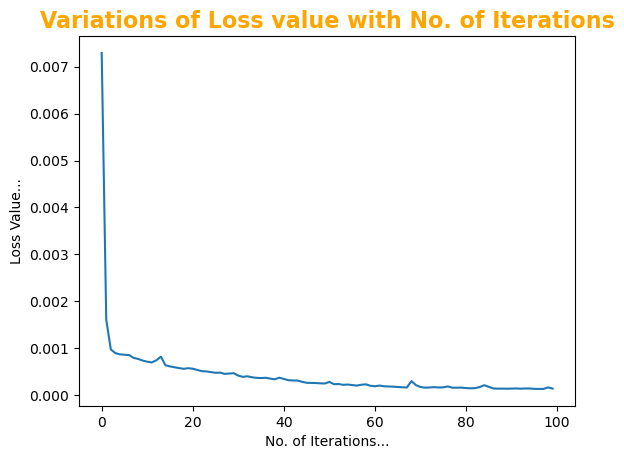

In [95]:
# Ploting Loss of our trained model

loss = model.history.history['loss']
plt.plot(loss)
plt.xlabel("No. of Iterations...")
plt.ylabel("Loss Value...")
plt.title("Variations of Loss value with No. of Iterations", color="orange", fontsize=16, fontweight="bold");

In [96]:
train_preds = minmax.inverse_transform(model.predict(X_train))
test_preds = minmax.inverse_transform(model.predict(X_test))

16/16 [==============================] - 1s 69ms/step


In [97]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_preds))

133.887266458944

In [98]:
math.sqrt(mean_squared_error(y_test, test_preds))

208.8880366817928

In [99]:
close_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [100]:
train_preds.shape

(1323, 1)

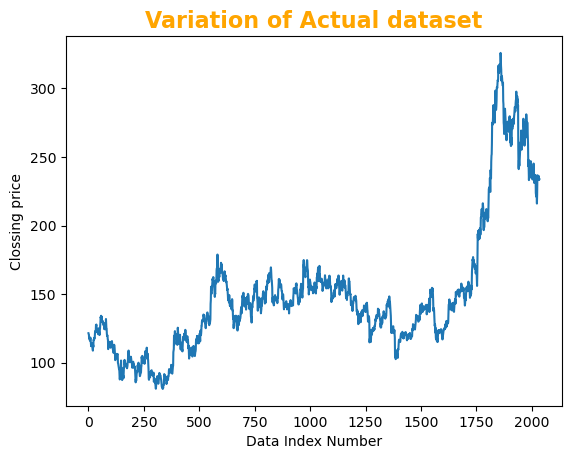

In [101]:
# shift train predictions for plotting

look_back=100  # to align predicted and actual on same curve...

trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_preds)+look_back, :] = train_preds

# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+(look_back*2)+1:len(close_df)-1, :] = test_preds

# plot baseline i.e. Actual value of Closing price..

plt.plot(minmax.inverse_transform(close_df))
plt.title("Variation of Actual dataset", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");

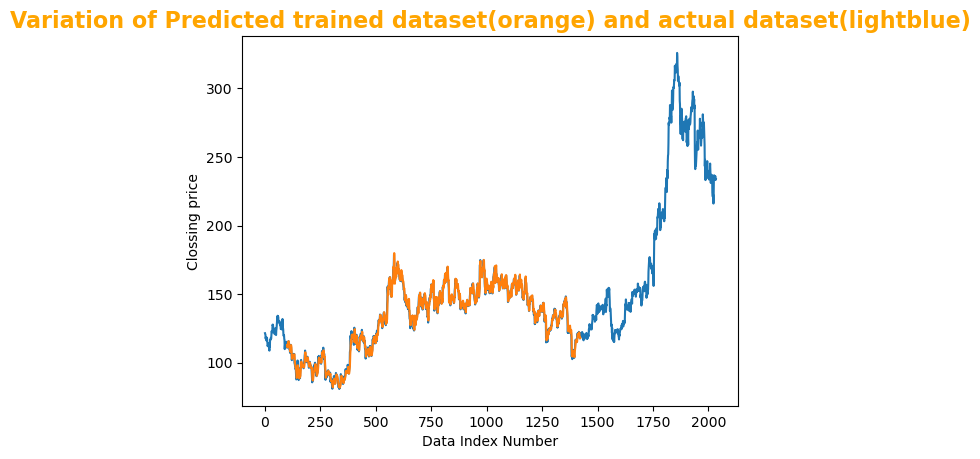

In [102]:
# Plot of Predictions on Closing Price made by our model on training dataset vs Actual Closing Price

plt.plot(minmax.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("Variation of Predicted trained dataset(orange) and actual dataset(lightblue)", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");

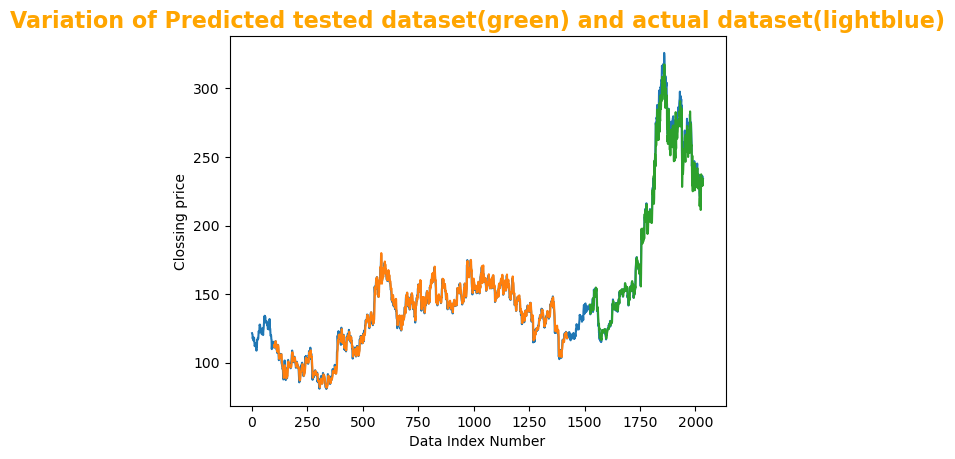

In [103]:
# Plot of Predictions on Closing Price made by our model on training dataset vs Actual Closing Price 
# vs Predictions on CLosing Price made by our model on test dataset

plt.plot(minmax.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("Variation of Predicted tested dataset(green) and actual dataset(lightblue)", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");
plt.plot(testPredictPlot)
plt.show()

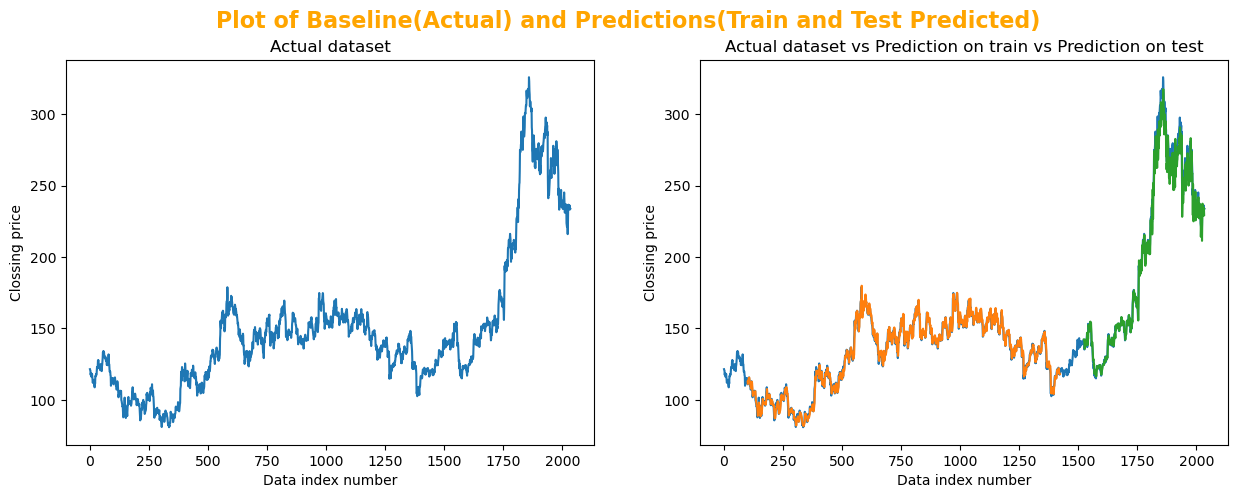

In [104]:
fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(15,5))
ax0.plot(minmax.inverse_transform(close_df))
ax0.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Actual dataset");

ax0.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Actual dataset");

ax1.plot(minmax.inverse_transform(close_df))
ax1.plot(trainPredictPlot)
ax1.plot(testPredictPlot)


ax1.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Actual dataset vs Prediction on train vs Prediction on test");

fig.suptitle(t="Plot of Baseline(Actual) and Predictions(Train and Test Predicted)",
             color="orange",
             fontsize=16,
             fontweight="bold");

In [105]:
# Let's check length of test_data...

len(test_data)

611

In [106]:
test_data.shape

(611, 1)

In [107]:
611-100

511

In [108]:
preds_input = test_data[511:]
preds_input[:5]

array([[0.85273693],
       [0.86213235],
       [0.83455882],
       [0.84375   ],
       [0.71466503]])

In [109]:
preds_input.shape

(100, 1)

In [110]:
# Reshaping into row matrix

preds_input = preds_input.reshape(1, -1)
preds_input.shape

(1, 100)

In [111]:
temp_input = list(preds_input)
len(temp_input)

1

In [112]:
temp_input = temp_input[0].tolist()

In [113]:
len(temp_input)

100

In [114]:
type(temp_input)

list

In [115]:
preds_input.shape[1]

100